In [8]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
data1 = pd.read_csv("student-por.csv")

In [7]:
data2 = pd.read_excel("D:\\BrainDead\\Overalldata.xlsx")

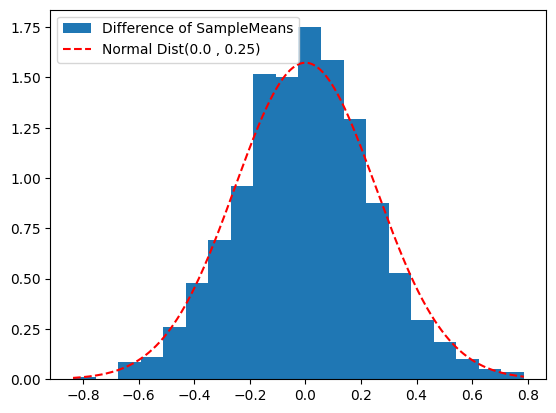

In [83]:
sample_1_size = 100
sample_2_size = 30
sample_means = []
for i in range(1000):
    sample_1 = data1['age'].sample(sample_1_size)
    sample_2 = data1['age'].sample(sample_2_size)
    sample_means.append(sample_1.values.mean() - sample_2.values.mean())
net_var = (data1['age'].var()/sample_1_size) + (data1['age'].var()/sample_2_size)
net_std = net_var**(0.5) 
net_mean = data1['age'].mean() - data1['age'].mean()
lb = min(sample_means)
ub = max(sample_means)
x = np.linspace(lb, ub,1000)
y = norm.pdf(x , net_mean , net_std) 
plt.hist(sample_means , 20 , (lb,ub) , density = True , label='Difference of SampleMeans') 
plt.plot(x , y , 'r--' , label = f'Normal Dist({net_mean} , {round(net_std , 2)})' )
plt.legend()
plt.show()